# **PART-1**
Extracting feature from pretrained model and apply KNN classifier

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from sklearn.metrics import confusion_matrix

path='/content/drive/MyDrive/AIP/Assignment-1'

model = VGG16(weights='imagenet', include_top=False)
#model.summary()

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
subdir=os.listdir(path+'/train_data')
train_subdir=[x for x in subdir if 'train' in x]
test_subdir=[x.replace('train','test') for x in train_subdir]

In [ ]:

#American_Goldfinch_train = class 0 (train data=40 , test data = 20)
#Red_headed_Woodpecker_train = class 1 (train data=40 , test data = 20)
#Marigold_train = class 2  (train data=40 , test data = 20)
#anthuriam_train = class 3 (train data=40 , test data = 20)
#frangipani_train = class 4 (train data=40 , test data = 20)
#Albatross_train = class 5 (train data=40 , test data = 20)



#train and test data stacked in this order in array

**Feature Extraction for Train Data**

In [ ]:
vgg16_feature_list_train = []
y_train=[]
#loading train images from folders and find features using model
for idx, dirname in tqdm(enumerate(train_subdir)):
    filenames=os.listdir(path+'/train_data/'+dirname)
    for i, fname in enumerate(filenames):
        if('.jpg' not in fname):
          continue
        img_path=path+'/train_data/'+dirname+'/'+fname
        img = image.load_img(img_path, target_size=(224, 224))
        img_data = image.img_to_array(img)
        img_data = np.expand_dims(img_data, axis=0)
        img_data = preprocess_input(img_data)

        vgg16_feature = model.predict(img_data)
        vgg16_feature_np = np.array(vgg16_feature)
        vgg16_feature_list_train.append(vgg16_feature_np.flatten())
        y_train.append(idx)

6it [03:06, 31.14s/it]


**Feature Extraction for Test Data**

In [ ]:
vgg16_feature_list_test = []
y_test=[]
#loading test images from folders and find features using model
for idx, dirname in tqdm(enumerate(test_subdir)):
    filenames=os.listdir(path+'/test_data/'+dirname)
    for i, fname in enumerate(filenames):
        if('.jpg' not in fname):
          continue
        img_path=path+'/test_data/'+dirname+'/'+fname
        img = image.load_img(img_path, target_size=(224, 224))
        img_data = image.img_to_array(img)
        img_data = np.expand_dims(img_data, axis=0)
        img_data = preprocess_input(img_data)

        vgg16_feature = model.predict(img_data)
        vgg16_feature_np = np.array(vgg16_feature)
        vgg16_feature_list_test.append(vgg16_feature_np.flatten())
        y_test.append(idx)
    print(dirname)

1it [00:15, 15.56s/it]

American_Goldfinch_test


2it [00:32, 16.42s/it]

Red_headed_Woodpecker_test


3it [00:48, 16.37s/it]

Marigold_test


4it [01:05, 16.28s/it]

anthuriam_test


5it [01:20, 16.12s/it]

frangipani_test


6it [01:36, 16.16s/it]

Albatross_test


In [ ]:
#Convert to numpy array
vgg16_feature_list_np_train = np.array(vgg16_feature_list_train)
vgg16_feature_list_np_test = np.array(vgg16_feature_list_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
y_test.shape

(120,)

**KNN**

In [ ]:
# Locate the K-most nearest neighbors
def Knn(train, test_row, num_neighbors):
  distances = list()
  for index,train_row in enumerate(train):
    dist = np.sqrt(np.sum(np.square(np.subtract(test_row,train_row))))
    distances.append((index, dist))
  distances.sort(key=lambda tup: tup[1])
  neighbors = []
  for i in range(num_neighbors):
    neighbors.append(distances[i][0])
  return neighbors

# Make a class prediction with KNN
def predict_classification(train, test_row, num_neighbors,y_train):
  neighbors = Knn(train, test_row, num_neighbors)
  output_values = [y_train[index] for index in neighbors]
  prediction = max(set(output_values), key=output_values.count)
  return prediction

#predict for all test data
y_pred=np.copy(y_test)
for i in range(len(y_test)):
  y_pred[i]=predict_classification(vgg16_feature_list_np_train,vgg16_feature_list_np_test[i].T,4,y_train)

In [ ]:
train_subdir,test_subdir

(['American_Goldfinch_train',
  'Red_headed_Woodpecker_train',
  'Marigold_train',
  'anthuriam_train',
  'frangipani_train',
  'Albatross_train'],
 ['American_Goldfinch_test',
  'Red_headed_Woodpecker_test',
  'Marigold_test',
  'anthuriam_test',
  'frangipani_test',
  'Albatross_test'])

In [ ]:
print(' Accuracy Of Model : ',np.sum((y_pred-y_test)==0)/len(y_test))
i=0
print(' Accuracy in Class 0 (American_Goldfinch_train) : ',np.sum((y_pred[i:i+20]-y_test[i:i+20])==0)/20)
i=i+20
print(' Accuracy in Class 1 (Red_headed_Woodpecker_train) : ',np.sum((y_pred[i:i+20]-y_test[i:i+20])==0)/20)
i=i+20
print(' Accuracy in Class 2 (Marigold_train) : ',np.sum((y_pred[i:i+20]-y_test[i:i+20])==0)/20)
i=i+20
print(' Accuracy in Class 3 (anthuriam_train) : ',np.sum((y_pred[i:i+20]-y_test[i:i+20])==0)/20)
i=i+20
print(' Accuracy in Class 4 (frangipani_train) : ',np.sum((y_pred[i:i+20]-y_test[i:i+20])==0)/20)
i=i+20
print(' Accuracy in Class 5 (Albatross_train) : ',np.sum((y_pred[i:i+20]-y_test[i:i+20])==0)/20)

 Accuracy Of Model :  0.7916666666666666
 Accuracy in Class 0 (American_Goldfinch_train) :  0.9
 Accuracy in Class 1 (Red_headed_Woodpecker_train) :  0.75
 Accuracy in Class 2 (Marigold_train) :  0.9
 Accuracy in Class 3 (anthuriam_train) :  0.25
 Accuracy in Class 4 (frangipani_train) :  1.0
 Accuracy in Class 5 (Albatross_train) :  0.95


In [ ]:
y_pred[60:80]

array([3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 3, 4, 4])

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

NameError: ignored

In [ ]:
cm=np.array([[18,  0,  0,  0,  2,  0],
       [ 0, 15,  0,  1,  1,  3],
       [ 0,  0, 18,  0,  2,  0],
       [ 0,  0,  0,  5, 15,  0],
       [ 0,  0,  0,  0, 20,  0],
       [ 0,  0,  0,  0,  1, 19]])


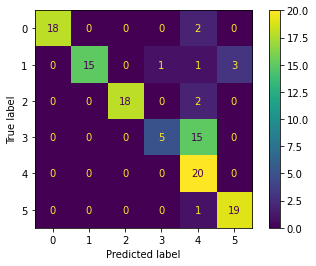

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
p=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1,2,3,4,5])
p.plot()
plt.show()